In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv

appleimages = []
bananaimages = []
n = 128
import os
for dirname, _, filenames in os.walk('D:/8th Semester/Ai/original_data_set'):
    for filename in filenames:
        index = dirname.find("freshapple")
        if(index>-1):
            path = os.path.join(dirname, filename)
            img = cv.imread(path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img = cv.resize(img,[n,n])
            appleimages.append(img)
        index = dirname.find("rottenapples")
        if(index>-1):
            path = os.path.join(dirname, filename)
            img = cv.imread(path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img = cv.resize(img,[n,n])
            appleimages.append(img)

        index = dirname.find("freshbanana")
        if(index>-1):
            path = os.path.join(dirname, filename)
            img = cv.imread(path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img = cv.resize(img,[n,n])
            bananaimages.append(img)
        index = dirname.find("rottenbanana")
        if(index>-1):
            path = os.path.join(dirname, filename)
            img = cv.imread(path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img = cv.resize(img,[n,n])
            bananaimages.append(img)


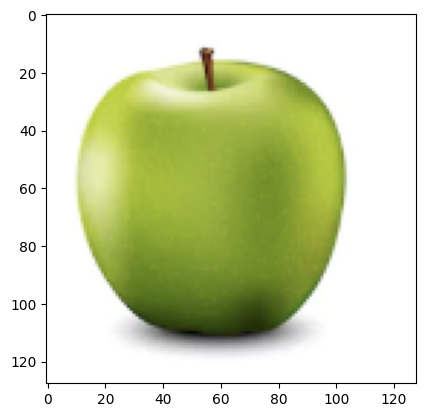

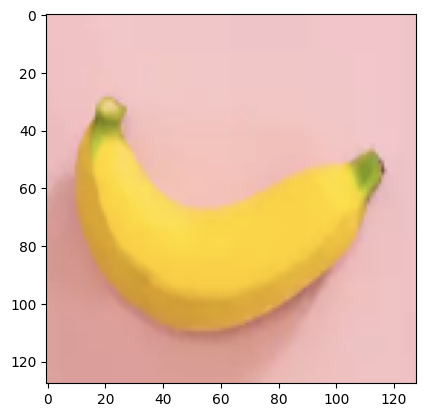

In [3]:
import matplotlib.pyplot as plt
plt.imshow(appleimages[35])
plt.show()
plt.imshow(bananaimages[35])
plt.show()

In [4]:
allimages = []
allcategories = []
for img in appleimages:
    allimages.append(img)
    allcategories.append(0)
#for img in orangeimages:
 #   allimages.append(img)
  #  allcategories.append(1)
for img in bananaimages:
    allimages.append(img)
    allcategories.append(1)

allimages = np.array(allimages)/255
allcategories = np.array(allcategories)


In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(allimages,allcategories, test_size=0.33, shuffle=True)
print(xtrain.shape)
print(xtest.shape)
xtrain_flattened = xtrain.reshape(xtrain.shape[0], -1)  # Assuming x_train is your image data
xtest_flattened = xtest.reshape(xtest.shape[0], -1)

# Normalize pixel values (optional)
xtest_normalized = xtest_flattened / 255.0
# Normalize pixel values (optional)
xtrain_normalized = xtrain_flattened / 255.0
print(xtrain_normalized.shape)


(1452, 128, 128, 3)
(716, 128, 128, 3)
(1452, 49152)


In [6]:
#Using Feed Forward Neural Network (Classical ANN).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization

def model_ann():
    model_ann = Sequential([
        Dense(256, activation='relu', input_shape=(49152,)),
        BatchNormalization(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    return model_ann

model_ann = model_ann()
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased number of epochs and additional strategies
history_ann = model_ann.fit(xtrain_normalized, ytrain, epochs=60, validation_split=0.15, verbose=True)


c:\Users\oem\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.8126 - loss: 0.4672 - val_accuracy: 0.6239 - val_loss: 0.6329
Epoch 2/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.9027 - loss: 0.2546 - val_accuracy: 0.7018 - val_loss: 0.5646
Epoch 3/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.9323 - loss: 0.1876 - val_accuracy: 0.7844 - val_loss: 0.5066
Epoch 4/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.9290 - loss: 0.1639 - val_accuracy: 0.7431 - val_loss: 0.4592
Epoch 5/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.9436 - loss: 0.1612 - val_accuracy: 0.7890 - val_loss: 0.4173
Epoch 6/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.9436 - loss: 0.1572 - val_accuracy: 0.8899 - val_loss: 0.3307
Epoch 7/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.9509 - loss: 0.1409 - val_accuracy: 0.9174 - val_loss: 0.2662
Epoch 8/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.9596 - loss: 0.1555 - val_accuracy: 0

23/23 - 1s - 22ms/step - accuracy: 0.8478 - loss: 0.5715


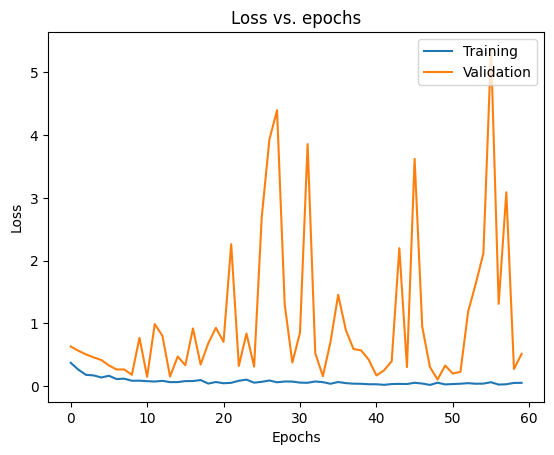

In [ ]:
# Evaluate the model on the test set
model_ann.evaluate(xtest_normalized, ytest, verbose=2)
import matplotlib.pylab as plt
%matplotlib inline
# Plot the training and validation loss
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [8]:
#Use of Convolution Neural Network (CNN).
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

def model_cnn():
    #   layer types linear, relu, tanh, sigmoid
    model_cnn = Sequential([
      Conv2D(64,(3,3),input_shape=(n,n,3)),
      MaxPooling2D((2,2)),
      (Conv2D(64,(5,5))),
      (MaxPooling2D((2,2))),
      (Flatten()),
      (Dense(128, activation="relu")),
      (Dense(512, activation="relu")),
      (Dropout(0.25)),
      (Dense(512, activation="tanh")),
      (Dense(2, activation="softmax"))
      ])
    return model_cnn
model_cnn = model_cnn()
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(xtrain, ytrain, epochs=60, batch_size=int(len(xtrain)/10),validation_split = 0.15,  verbose=2)

c:\Users\oem\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/60
9/9 - 41s - 5s/step - accuracy: 0.4887 - loss: 1.5506 - val_accuracy: 0.5413 - val_loss: 0.8364
Epoch 2/60
9/9 - 28s - 3s/step - accuracy: 0.5284 - loss: 0.8457 - val_accuracy: 0.5413 - val_loss: 0.7811
Epoch 3/60
9/9 - 28s - 3s/step - accuracy: 0.5446 - loss: 0.7430 - val_accuracy: 0.5505 - val_loss: 0.7827
Epoch 4/60
9/9 - 26s - 3s/step - accuracy: 0.6175 - loss: 0.6702 - val_accuracy: 0.7569 - val_loss: 0.5165
Epoch 5/60
9/9 - 25s - 3s/step - accuracy: 0.7828 - loss: 0.4725 - val_accuracy: 0.8073 - val_loss: 0.3871
Epoch 6/60
9/9 - 25s - 3s/step - accuracy: 0.8493 - loss: 0.3079 - val_accuracy: 0.8761 - val_loss: 0.2418
Epoch 7/60
9/9 - 28s - 3s/step - accuracy: 0.9060 - loss: 0.2138 - val_accuracy: 0.8899 - val_loss: 0.2137
Epoch 8/60
9/9 - 27s - 3s/step - accuracy: 0.9198 - loss: 0.2101 - val_accuracy: 0.8991 - val_loss: 0.1998
Epoch 9/60
9/9 - 25s - 3s/step - accuracy: 0.9141 - loss: 0.1944 - val_accuracy: 0.9037 - val_loss: 0.1709
Epoch 10/60
9/9 - 24s - 3s/step - acc

23/23 - 3s - 136ms/step - accuracy: 0.9832 - loss: 0.0915


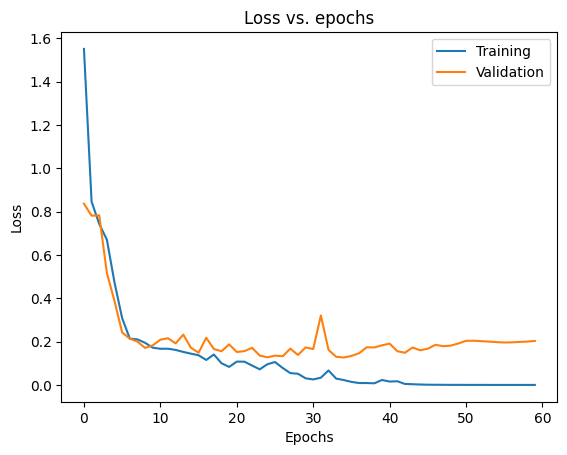

23/23 - 3s - 147ms/step - accuracy: 0.9832 - loss: 0.0915


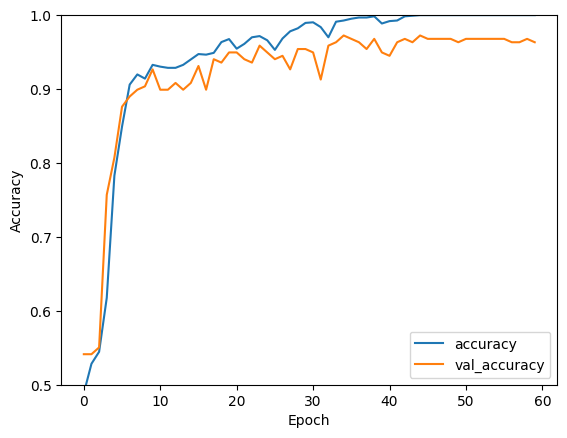

In [9]:
# Evaluate the model on the test set
model_cnn.evaluate(xtest, ytest, verbose=2)
import matplotlib.pylab as plt
%matplotlib inline
# Plot the training and validation loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
########################
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn.evaluate(xtest, ytest, verbose=2)

In [11]:
#Use of Transfer Learning with one of the pretrained models: RESNET:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def model_resnet() :
  # Load the pretrained ResNet50 model
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(n, n, 3))

  # Freeze the pretrained layers so they are not updated during training
  for layer in base_model.layers:
      layer.trainable = False

  # Create a new model on top of the pretrained base model
  model_resnet = Sequential([
      base_model,
      GlobalAveragePooling2D(),
      Dense(128, activation='relu'),
      Dense(2, activation='softmax')
  ])
  return model_resnet
model_resnet = model_resnet()
# Compile the model
model_resnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with your data
history_resnet = model_resnet.fit(xtrain, ytrain, epochs=60, batch_size=int(len(xtrain)/10), validation_split=0.15, verbose=2)


KeyboardInterrupt: 

10/10 - 1s - loss: 0.1243 - accuracy: 0.9596 - 527ms/epoch - 53ms/step


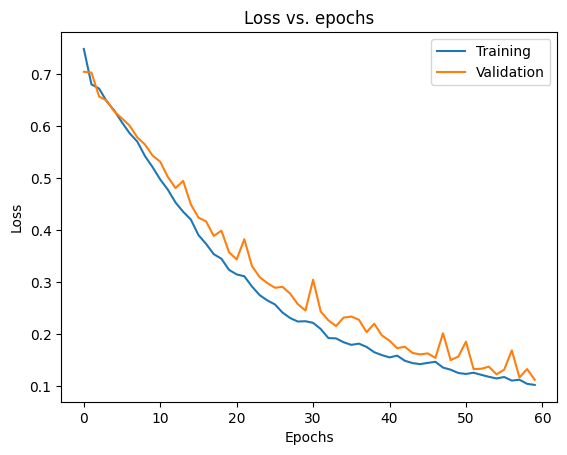

10/10 - 0s - loss: 0.1243 - accuracy: 0.9596 - 478ms/epoch - 48ms/step


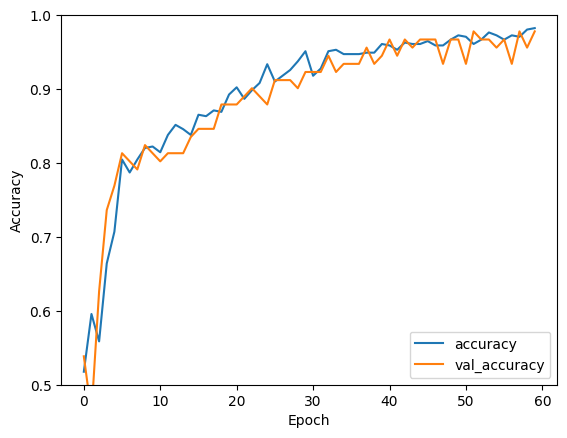

In [ ]:
# Evaluate the model on the test set
model_resnet.evaluate(xtest, ytest, verbose=2)
import matplotlib.pylab as plt
%matplotlib inline
# Plot the training and validation loss
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
plt.plot(history_resnet.history['accuracy'], label='accuracy')
plt.plot(history_resnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_resnet.evaluate(xtest, ytest, verbose=2)

In [ ]:
# Define a function to evaluate the success rate for a given model
def evaluate_success_rate(model, xtest, ytest):
    correct_count = [0, 0]  # Initialize counters for object one and object two

    # Make predictions for all samples in the test dataset
    predictions = model.predict(xtest)
    predicted_labels = np.argmax(predictions, axis=1)

    # Count correct predictions for each object
    for i in range(len(ytest)):
        if predicted_labels[i] == ytest[i]:
            correct_count[ytest[i]] += 1

    # Calculate success rate
    success_rate = (correct_count[0] + correct_count[1]) / 20

    return success_rate

# Repeat the evaluation process ten times for each technique
success_rates_ann = []
success_rates_cnn = []
success_rates_resnet = []

for _ in range(10):
    # Evaluate success rate for ANN
    success_rate_ann = evaluate_success_rate(model_ann, xtest_normalized, ytest)
    success_rates_ann.append(success_rate_ann)

    # Evaluate success rate for CNN
    success_rate_cnn = evaluate_success_rate(model_cnn, xtest, ytest)
    success_rates_cnn.append(success_rate_cnn)

    # Evaluate success rate for ResNet (or any other transfer learning model)
    success_rate_resnet = evaluate_success_rate(model_resnet, xtest, ytest)
    success_rates_resnet.append(success_rate_resnet)

# Calculate average success rates
avg_success_rate_ann = np.mean(success_rates_ann)
avg_success_rate_cnn = np.mean(success_rates_cnn)
avg_success_rate_resnet = np.mean(success_rates_resnet)

# Compare the success rates of each technique
print("Average Success Rate (ANN):", avg_success_rate_ann)
print("Average Success Rate (CNN):", avg_success_rate_cnn)
print("Average Success Rate (ResNet):", avg_success_rate_resnet)


10/10 [==============================] - 0s 32ms/step
Average Success Rate (ANN): 14.0
Average Success Rate (CNN): 14.75
Average Success Rate (ResNet): 14.25


In [ ]:
model_ann.save('my_model_ann.h5')
model_cnn.save('my_model_cnn.h5')
model_resnet.save('my_model_resnet.h5')



In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load your trained CNN model
model_cnn = load_model('my_model_cnn.h5')

# Function to preprocess frames and run inference using the CNN model
def process_frame_cnn(frame):
    # Preprocess the frame (resize, convert color, normalize, etc.)
    processed_frame = cv2.resize(frame, (n, n))  # Resize frame to match model input shape
    processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    processed_frame = processed_frame.astype(np.float32) / 255.0  # Normalize pixel values

    # Run inference on the preprocessed frame using the CNN model
    predictions = model_cnn.predict(np.expand_dims(processed_frame, axis=0))

    return predictions

# Function to display results
def display_results(frame, predictions):
    # Add your visualization logic here
    # For example, draw bounding boxes around detected objects
    # or overlay labels on the objects

    # Display the frame with predictions
    cv2.imshow('Object Detection (CNN)', frame)
    cv2.waitKey(1)

# Open webcam
cap = cv2.VideoCapture(0)

# Main loop to capture frames and run inference
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame and run inference using the CNN model
    predictions = process_frame_cnn(frame)

    # Display results
    display_results(frame, predictions)

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


Saving apple_test_image_1.jfif to apple_test_image_1 (1).jfif
1/1 [==============================] - 0s 75ms/step


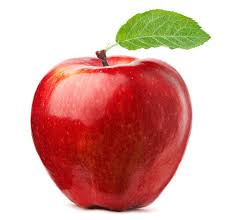

Prediction Probabilities:
Apple: 1.0
Banana: 6.2771294e-10


Saving banana_test_image_1.webp to banana_test_image_1 (5).webp
1/1 [==============================] - 0s 18ms/step


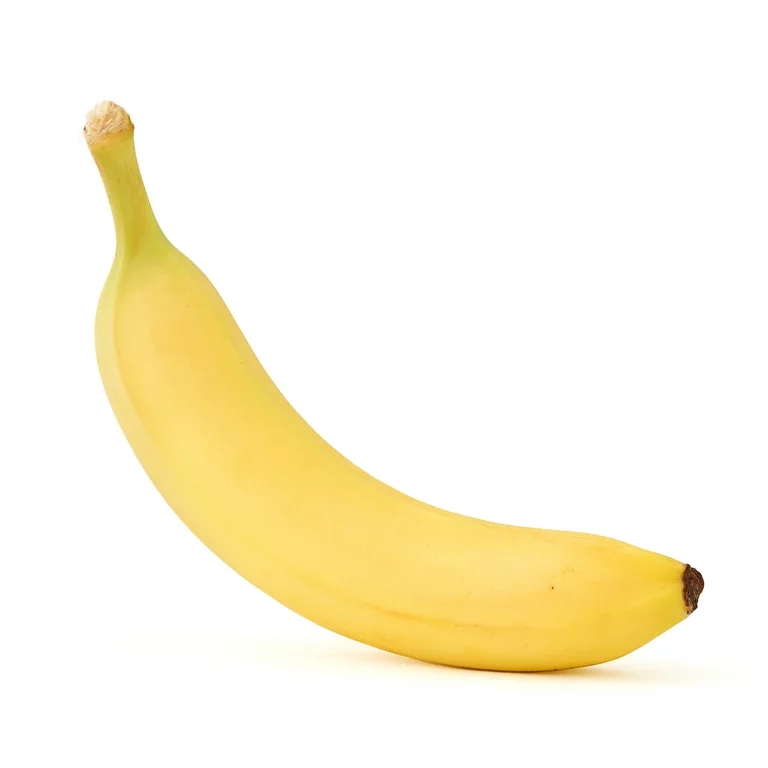

Prediction Probabilities:
Apple: 3.75435e-09
Banana: 1.0


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab import files
from google.colab.patches import cv2_imshow

# Load your trained CNN model
model_cnn = load_model('my_model_cnn.h5')

# Function to preprocess frames and run inference using the CNN model
def process_frame_cnn(frame):
    # Preprocess the frame (resize, convert color, normalize, etc.)
    processed_frame = cv2.resize(frame, (n, n))  # Resize frame to match model input shape
    processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    processed_frame = processed_frame.astype(np.float32) / 255.0  # Normalize pixel values

    # Run inference on the preprocessed frame using the CNN model
    predictions = model_cnn.predict(np.expand_dims(processed_frame, axis=0))

    return predictions

# Function to display results
def display_results(frame, predictions):
    # Display the frame with predictions
    cv2_imshow(frame)

    # Print the prediction probabilities
    print("Prediction Probabilities:")
    print("Apple:", predictions[0][0])
    print("Banana:", predictions[0][1])

# Upload the image file
uploaded = files.upload()

# Load the uploaded image file
for filename in uploaded.keys():
    frame = cv2.imread(filename)

# Process the image and run inference using the CNN model
predictions = process_frame_cnn(frame)

# Display results
display_results(frame, predictions)

# Upload the image file
uploaded = files.upload()

# Load the uploaded image file
for filename in uploaded.keys():
    frame = cv2.imread(filename)

# Process the image and run inference using the CNN model
predictions = process_frame_cnn(frame)

# Display results
display_results(frame, predictions)


In [12]:
import cv2
import numpy as np
import serial
from keras.models import load_model

# Load your trained CNN model
model_cnn = load_model('D:\Downloads/4 apr downloads/my_model_cnn (2).h5')

# Establish serial connection with Arduino
arduino_serial = serial.Serial('COM3', 9600)  # Change 'COM3' to your Arduino's serial port

# Function to preprocess frames and run inference using the CNN model
def process_frame_cnn(frame):
    # Preprocess the frame (resize, convert color, normalize, etc.)
    n = 128  # Define the size of the input image
    processed_frame = cv2.resize(frame, (n, n))  # Resize frame to match model input shape
    processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    processed_frame = processed_frame.astype(np.float32) / 255.0  # Normalize pixel values
    
    # Run inference on the preprocessed frame using the CNN model
    predictions = model_cnn.predict(np.expand_dims(processed_frame, axis=0))
    
    return predictions

# Function to send result to Arduino
def send_to_arduino(result):
    if result == "Apple":
        arduino_serial.write(b'1')  # Send '1' to Arduino for Apple
    elif result == "Banana":
        arduino_serial.write(b'2')  # Send '2' to Arduino for Banana

# Function to display results
def display_results(frame, predictions):
    # Display the frame with predictions
    cv2.imshow('Object Detection (CNN)', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Extract result label based on prediction probabilities
    result_label = "Apple" if predictions[0][0] > predictions[0][1] else "Banana"

    # Print prediction probabilities
    print("Prediction Probabilities:")
    print("Apple:", predictions[0][0])
    print("Banana:", predictions[0][1])

    # Send result to Arduino
    send_to_arduino(result_label)

# Load the image file
image_path = 'D:/8th Semester/Ai/apple_test_image_1.jfif'  
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is None:
    raise ValueError("Error: Unable to load image")

# Process the image and run inference using the CNN model
predictions = process_frame_cnn(frame)

# Display results
display_results(frame, predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction Probabilities:
Apple: 1.0
Banana: 5.6164035e-10


In [13]:
import cv2
import numpy as np
import serial
from keras.models import load_model

# Load your trained CNN model
model_cnn = load_model('D:\Downloads/4 apr downloads/my_model_cnn (2).h5')

# Establish serial connection with Arduino
arduino_serial = serial.Serial('COM3', 9600)  # Change 'COM3' to your Arduino's serial port

# Function to preprocess frames and run inference using the CNN model
def process_frame_cnn(frame):
    # Preprocess the frame (resize, convert color, normalize, etc.)
    n = 128  # Define the size of the input image
    processed_frame = cv2.resize(frame, (n, n))  # Resize frame to match model input shape
    processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    processed_frame = processed_frame.astype(np.float32) / 255.0  # Normalize pixel values
    
    # Run inference on the preprocessed frame using the CNN model
    predictions = model_cnn.predict(np.expand_dims(processed_frame, axis=0))
    
    return predictions

# Function to send result to Arduino
def send_to_arduino(result):
    if result == "Apple":
        arduino_serial.write(b'1')  # Send '1' to Arduino for Apple
    elif result == "Banana":
        arduino_serial.write(b'2')  # Send '2' to Arduino for Banana

# Function to display results
def display_results(frame, predictions):
    # Display the frame with predictions
    cv2.imshow('Object Detection (CNN)', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Extract result label based on prediction probabilities
    result_label = "Apple" if predictions[0][0] > predictions[0][1] else "Banana"

    # Print prediction probabilities
    print("Prediction Probabilities:")
    print("Apple:", predictions[0][0])
    print("Banana:", predictions[0][1])

    # Send result to Arduino
    send_to_arduino(result_label)

# Load the image file
image_path = 'D:/8th Semester/Ai/banana_test_image_2.jfif'  
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is None:
    raise ValueError("Error: Unable to load image")

# Process the image and run inference using the CNN model
predictions = process_frame_cnn(frame)

# Display results
display_results(frame, predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Prediction Probabilities:
Apple: 1.9437327e-11
Banana: 1.0


In [ ]:
import cv2
import numpy as np
import serial
import time
import tensorflow as tf

# Load the new trained model (ResNet or any other)
model = tf.keras.models.load_model('D:\Downloads/4 apr downloads/my_model_cnn (2).h5')

# Preprocess the image
def preprocess_image(image):
    # Check if the image is empty
    if image is None:
        raise ValueError("Error: Empty image")

    # Resize the image to match the input size used during training
    resized_image = cv2.resize(image, (128, 128))
    # Convert the image to a numpy array and normalize
    normalized_image = resized_image.astype("float") / 255.0
    # Expand the dimensions to match the model's input shape
    preprocessed_image = np.expand_dims(normalized_image, axis=0)
    return preprocessed_image

# Establish serial connection with Arduino
arduino_serial = serial.Serial('COM3', 9600)  # Change 'COM3' to your Arduino's serial port
time.sleep(2)  # Wait for Arduino to initialize

# Function to capture image on button click
def capture_image(event, x, y, flags, param):
    global frame, captured
    if event == cv2.EVENT_LBUTTONDOWN:
        captured = True

# Capture an image from webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Create a window to display the webcam feed
cv2.namedWindow('Webcam')
cv2.setMouseCallback('Webcam', capture_image)

captured = False

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame is read successfully
    if not ret:
        raise ValueError("Error: Unable to read frame from webcam")

    # Show the webcam feed
    cv2.imshow('Webcam', frame)

    # Wait for the 'q' key to exit or the 'c' key to capture the image
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('c') or captured:
        # Preprocess and predict
        preprocessed_image = preprocess_image(frame)
        prediction = model.predict(preprocessed_image)[0]

        # Determine the result
        if prediction[0] < 0.5:
            result = "Banana"
            # Send signal to Arduino to move servo for banana
            arduino_serial.write(b'1')
        else:
            result = "Apple"
            # Send signal to Arduino to move servo for apple
            arduino_serial.write(b'2')

        print("Predicted:", result)
        print(prediction)

        # Show the captured image with the prediction
        cv2.imshow('Captured Image', frame)
        cv2.waitKey(0)

        # Reset the captured flag
        captured = False

# Release webcam and close any open windows
cap.release()
cv2.destroyAllWindows()
